
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
## Not for grading

## Learning Objective

At the end of the experiment, you will be able to :

* Perform SVM classifier

## Dataset

#### Description
The Iris dataset consists of 150 data instances. There are 3 classes (Iris Versicolor, Iris Setosa and Iris Virginica) each have 50 instances. 


For each flower we have the below data attributes 

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

To make our experiment easy we rename the classes  with numbers : 

    "0": setosa
    "1": versicolor
    "2": virginica
    

### Challenges

When we use the data with large number of features or dimensionality, models usually choke because

    1. Training time increases exponentially with number of features.
    2. Models have increasing risk of overfitting with increasing number of features.
    
To avoid the above mentioned problems while learning about data analysis, we use simple, well behaved, data that reduces the cognitive load, and makes it easier to debug as we are able to better comprehend the data we are working with.  

Hence, this is a good dataset to work on.

## Domain Information



Iris Plants are flowering plants with showy flowers. They are very popular among movie directors as it gives excellent background. 

They are predominantly found in dry, semi-desert, or colder rocky mountainous areas in Europe and Asia. They have long, erect flowering stems and can produce white, yellow, orange, pink, purple, lavender, blue or brown colored flowers. There are 260 to 300 types of iris.

![alt text](https://cdn-images-1.medium.com/max/1275/1*7bnLKsChXq94QjtAiRn40w.png)

As you could see, flowers have 3 sepals and 3 petals.  The sepals are usually spreading or drop downwards and the petals stand upright, partly behind the sepal bases. However, the length and width of the sepals and petals vary for each type.


### Setup Steps

In [1]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U1W4_12_SVM_Linear_Classifier_Iris" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Iris.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


###Importing Required Packages

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

### Loading the data

In [5]:
iris = pd.read_csv("Iris.csv")

### View the data features and labels

In [6]:
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [7]:
labels = iris.Species
features = iris.drop('Species',axis=1)

###From the given data, we will select the sepal-length and sepal-width for the setosa and versicolor species as they are linearly separable  

In [11]:
#Create a small dataset for SVM classification, consisting of sepal-length and sepal-width from setosa and versicolor 

df=iris[(iris['Species']!='Iris-virginica')]
df=df.drop(['PetalWidthCm','PetalLengthCm'], axis=1)
df.head()

# above: we have selected only setosa and versicolor and not virginica (!='virginica')
# petal_length and petal_width have been dropped from the dataframe

,Id,SepalLengthCm,SepalWidthCm,Species
0,1,5.1,3.5,Iris-setosa
1,2,4.9,3.0,Iris-setosa
2,3,4.7,3.2,Iris-setosa
3,4,4.6,3.1,Iris-setosa
4,5,5.0,3.6,Iris-setosa


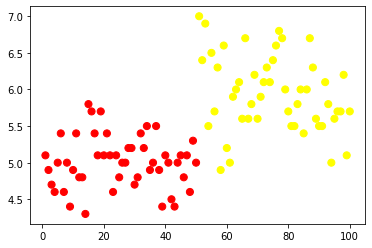

In [12]:
#Convert categorical values to numerical targets
df=df.replace('Iris-setosa', 0)
df=df.replace('Iris-versicolor', 1)
#Assign data to 'X' and labels to 'y'
X1=df.iloc[:,0:2]
y1=df['Species']
#view the scatter plot
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=y1, s=50, cmap='autumn')

#### Train the SVM model and test

In [13]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)

In [14]:
#Perform train-test split of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.3, shuffle=False)

In [15]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(70, 2) (70,)
(30, 2) (30,)


In [16]:
#Fit the model using training data
from sklearn.metrics import accuracy_score
model.fit(X_train, y_train)

# Predict the model 
predict = model.predict(X_test)

# Calculate the accuracy
accuracy_score(y_test, predict)


1.0

#### View the coordinates of the support vectors and Visualize them

In [17]:
model.support_vectors_

array([[50. ,  5. ],
       [51. ,  7. ],
       [52. ,  6.4]])

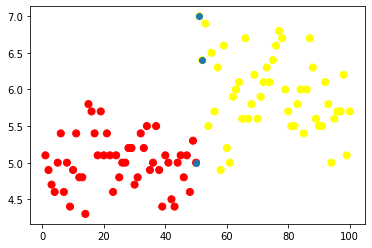

In [18]:
# Visualize the support vectors in the plot 
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=y1, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

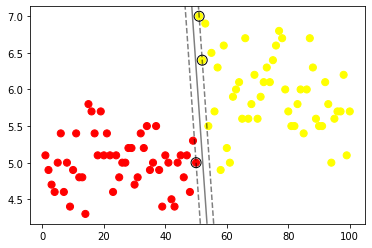

In [20]:
#@title ###**Visualize the coefficients of the hyperplane that maximize the margin**
ax = plt.gca()
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=y1, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### Exercise01: From the above dataset we will select the sepal-length and sepal-width for the setosa and virginica species as they are linearly separable 

In [21]:
#YOUR CODE HERE
df=iris[(iris['Species']!='Iris-versicolor')]
df=df.drop(['PetalWidthCm','PetalLengthCm'], axis=1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,Species
0,1,5.1,3.5,Iris-setosa
1,2,4.9,3.0,Iris-setosa
2,3,4.7,3.2,Iris-setosa
3,4,4.6,3.1,Iris-setosa
4,5,5.0,3.6,Iris-setosa


In [22]:
#save the new dataset
df.to_csv('newData.csv')

In [23]:
newData = pd.read_csv('newData.csv')

In [24]:
newData.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,Species
0,0,1,5.1,3.5,Iris-setosa
1,1,2,4.9,3.0,Iris-setosa
2,2,3,4.7,3.2,Iris-setosa
3,3,4,4.6,3.1,Iris-setosa
4,4,5,5.0,3.6,Iris-setosa


### Exercise02: Convert categorical values to numerical targets and plot the graph for setosa and virginica

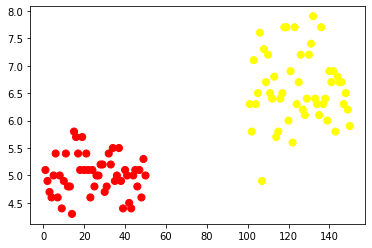

In [25]:
#Convert categorical values to numerical targets
df=df.replace('Iris-setosa', 0)
df=df.replace('Iris-virginica', 1)
#Assign data to 'X' and labels to 'y'
X2=df.iloc[:,0:2]
y2=df['Species']
#view the scatter plot
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y2, s=50, cmap='autumn')

### Exercise03: Find the support vectors and visualize them

[[ 50.    5. ]
 [101.    6.3]]


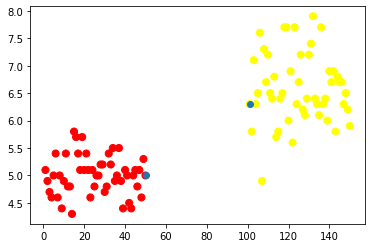

In [28]:
#YOUR CODE HERE 
model.fit(X2, y2)
print(model.support_vectors_)
# Visualize the support vectors in the plot 
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y2, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

## Please answer the questions below to complete the experiment:

In [29]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Too Simple, I am wasting time" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [30]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "No thing " #@param {type:"string"}


In [32]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [31]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [33]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 3715
Date of submission:  14 Sep 2020
Time of submission:  08:24:51
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
